# Time Series Analysis MTH333: End-Semester Exam


In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA


from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf


### EUR/INR exchange rates between 2014-2017

In [2]:
data = pd.read_csv('./EURINR2014-17.csv')
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,1/1/2014,84.986000,85.244003,84.935997,84.884003,84.884003,0
1,1/2/2014,85.125000,85.417000,84.373001,85.119003,85.119003,0
2,1/3/2014,84.810997,85.450996,84.472000,85.014999,85.014999,0
3,1/6/2014,84.517998,84.945999,84.421997,84.581001,84.581001,0
4,1/7/2014,84.926003,85.079002,84.570000,84.851997,84.851997,0
...,...,...,...,...,...,...,...
1038,12/25/2017,74.904198,76.024696,74.904198,75.837997,75.837997,0
1039,12/26/2017,74.904198,76.051201,74.904198,75.837997,75.837997,0
1040,12/27/2017,75.874001,76.352898,75.858002,75.866997,75.866997,0
1041,12/28/2017,76.223000,76.569099,76.197998,76.228996,76.228996,0


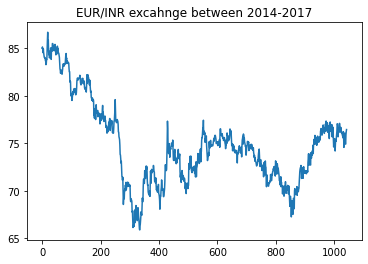

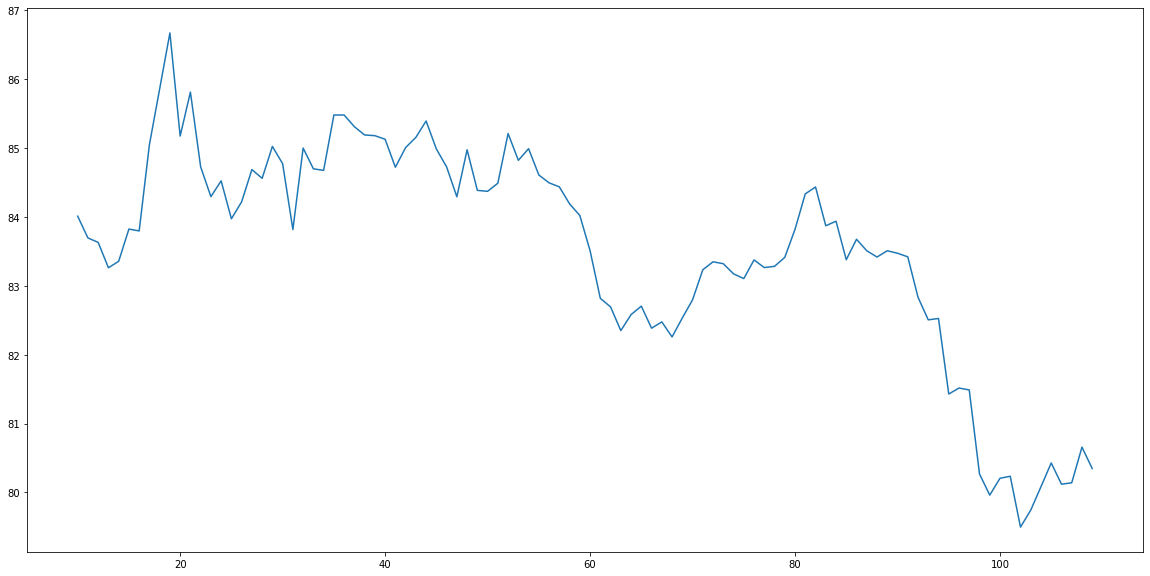

In [3]:

plt.plot((data['Open']))
plt.title('EUR/INR excahnge between 2014-2017')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(data.Open[10:110])


In [4]:
adfuller(data['Open'])   #to check stationarity

(-2.401327568923148,
 0.14136206271218854,
 5,
 1037,
 {'1%': -3.436671659540904,
  '5%': -2.8643311477003515,
  '10%': -2.5682561222519897},
 1561.8233523581482)

#### We can see that the data is not stationary.

In [5]:
x=np.log(np.array(data['Open']))
diff_x=[]

for i in range(1,len(x)):
    diff_x.append(x[i]-x[i-1])     # creating log_diff_data

adfuller(diff_x)     #to check stationarity

(-14.001565535041829,
 3.8537160904638266e-26,
 4,
 1037,
 {'1%': -3.436671659540904,
  '5%': -2.8643311477003515,
  '10%': -2.5682561222519897},
 -7193.317722782342)

#### Now the data is staionary.


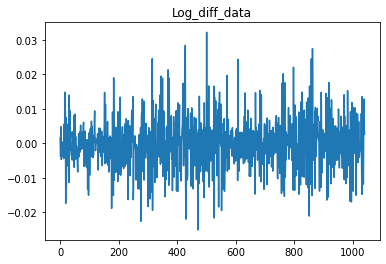

In [6]:
plt.plot(diff_x)
plt.title('Log_diff_data')
plt.show()

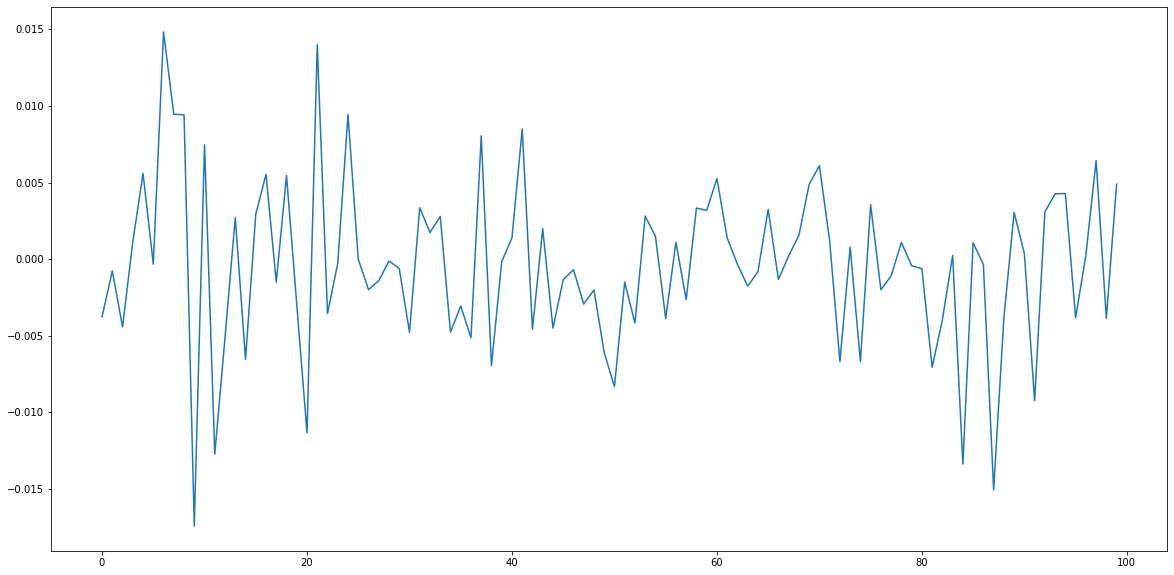

In [7]:
plt.figure(figsize=(20,10))
plt.plot(diff_x[10:110])

We can also see that there is not any visible seasonality.

## Plotting ACF and PACF

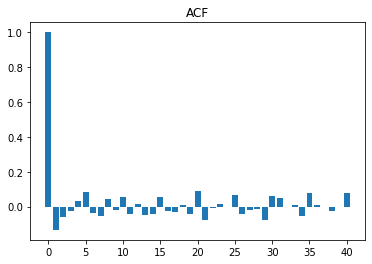

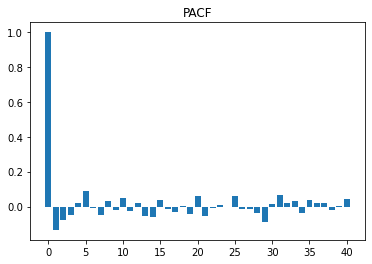

In [8]:
plt.figure()
a=acf(diff_x, nlags=40)     # acf
p=pacf(diff_x, nlags=40 )   # pacf
plt.bar(np.arange(41), a)
plt.title('ACF')
plt.show()
plt.bar(np.arange(41), p)
plt.title('PACF')
plt.show()

I'm guessing p=3, q=2 are significant. Let's try plotting the acf and pacf of the initial data.

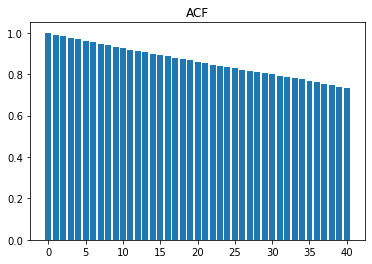

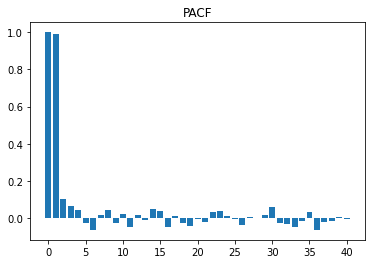

In [9]:
a=acf(data['Open'], nlags=40)
p=pacf(data['Open'], nlags=40 )
plt.bar(np.arange(41), a)
plt.title('ACF')
plt.show()
plt.bar(np.arange(41), p)
plt.title('PACF')
plt.show()

Now, I can assume it will AR(1) model.

In [10]:
order=[(p,d,q) for p in range(0,4) for d in range(0,3) for q in range(0,3)]
aic=[]
#for p in range(1,3):
for item in order:
 #   for q in range(1,2):
        model=ARIMA(data['Open'], order=(item[0],item[1],item[2]))
        fitted_model=model.fit()
        aic.append([fitted_model.aic,item])
    
aic



C:\Users\NIKHIL KUMAR\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\NIKHIL KUMAR\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[[6044.64807624506, (0, 0, 0)],
 [4800.431312710669, (0, 0, 1)],
 [3960.1881253993442, (0, 0, 2)],
 [1633.582825888776, (0, 1, 0)],
 [1613.412049887525, (0, 1, 1)],
 [1611.7314421392093, (0, 1, 2)],
 [2485.9839808416327, (0, 2, 0)],
 [1641.7185932955526, (0, 2, 1)],
 [1621.6764036272184, (0, 2, 2)],
 [1640.7486909993397, (1, 0, 0)],
 [1621.5869369009984, (1, 0, 1)],
 [1620.1447842791413, (1, 0, 2)],
 [1616.531834788603, (1, 1, 0)],
 [1612.2607053983593, (1, 1, 1)],
 [1613.7089895225915, (1, 1, 2)],
 [2137.773273964244, (1, 2, 0)],
 [1624.7928777875197, (1, 2, 1)],
 [1620.4894529085213, (1, 2, 2)],
 [1624.4925326635089, (2, 0, 0)],
 [1620.680542832426, (2, 0, 1)],
 [1622.1537457926004, (2, 0, 2)],
 [1612.5606023930072, (2, 1, 0)],
 [1613.470558676851, (2, 1, 1)],
 [1611.222875826826, (2, 1, 2)],
 [1985.665770806454, (2, 2, 0)],
 [1620.8138091278784, (2, 2, 1)],
 [1628.6589718658367, (2, 2, 2)],
 [1620.8593436424862, (3, 0, 0)],
 [1621.8890801608163, (3, 0, 1)],
 [1617.6534619188774, (3,

#### The minimum AIC is found for p=2, d=1, q=2. So, I used ARIMA(2,1,2)

# Fitting ARIMA(2,1,2) model

In [11]:
model = ARIMA(data["Open"], order=(2,1,2))  #using ARIMA(2,1,2)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                 1043
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -800.611
Date:                Sat, 07 May 2022   AIC                           1611.223
Time:                        04:56:10   BIC                           1635.967
Sample:                             0   HQIC                          1620.609
                               - 1043                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6375      0.210      3.033      0.002       0.226       1.049
ar.L2         -0.5789      0.118     -4.922      0.000      -0.809      -0.348
ma.L1         -0.7664      0.211     -3.638      0.000      -1.179      -0.353
ma.L2          0.5801      0.127      4.568      0.000       0.331       0.829
sigma2         0.2722      0.009     29.613      0.000       0.254       0.290
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):               102.62
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.20
Prob(H) (two-sided):                  0.84   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

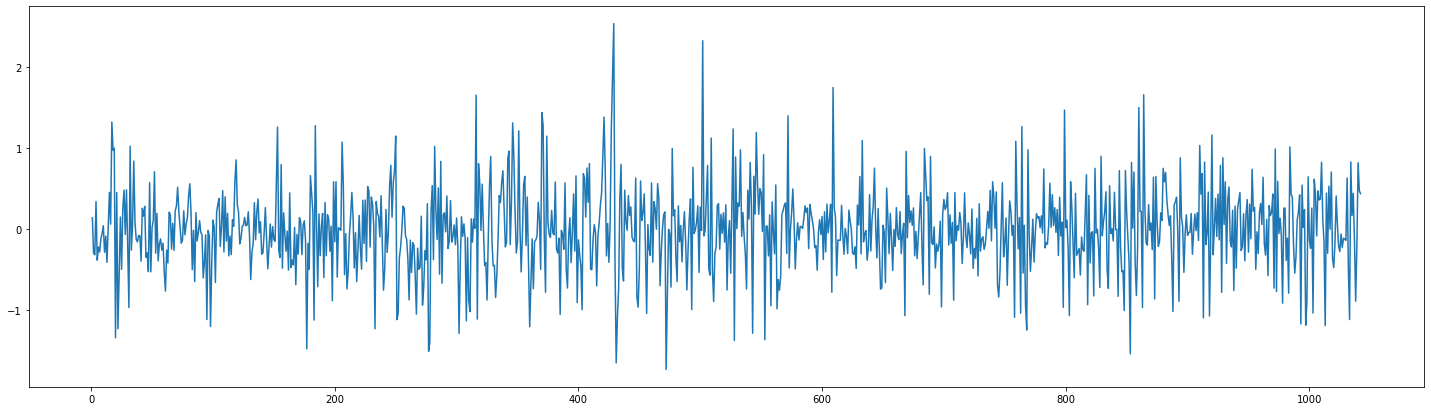

In [12]:
residuals = model_fit.resid  #residuals of model
plt.figure(figsize=(25,7))
plt.plot(residuals[1:])
plt.show()

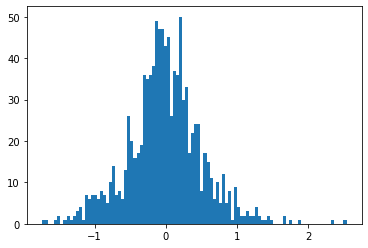

In [13]:
residuals = model_fit.resid

plt.hist(residuals[1:],bins=100)
plt.show()

 As, it is almost normal distribution, so we can say it is pure noise.

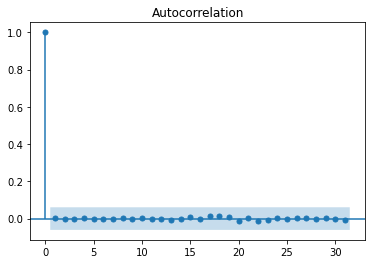

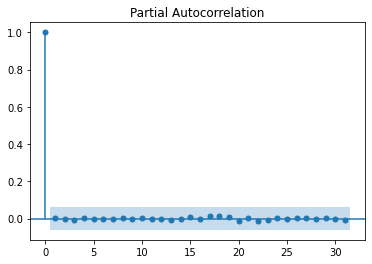

In [14]:
plot_acf(residuals)
plt.show()
plot_pacf(residuals)
plt.show()

From acf and pacf of residuals I'm assuming that residuals are independent from each other.

In [15]:
print(np.var(residuals[:len(residuals)//2]))
print(np.var(residuals[len(residuals)//2:]))

14.140169807527812
0.24843007257143954


As variance are different for different time, then volatility is not constant.

### Calculating Volatility

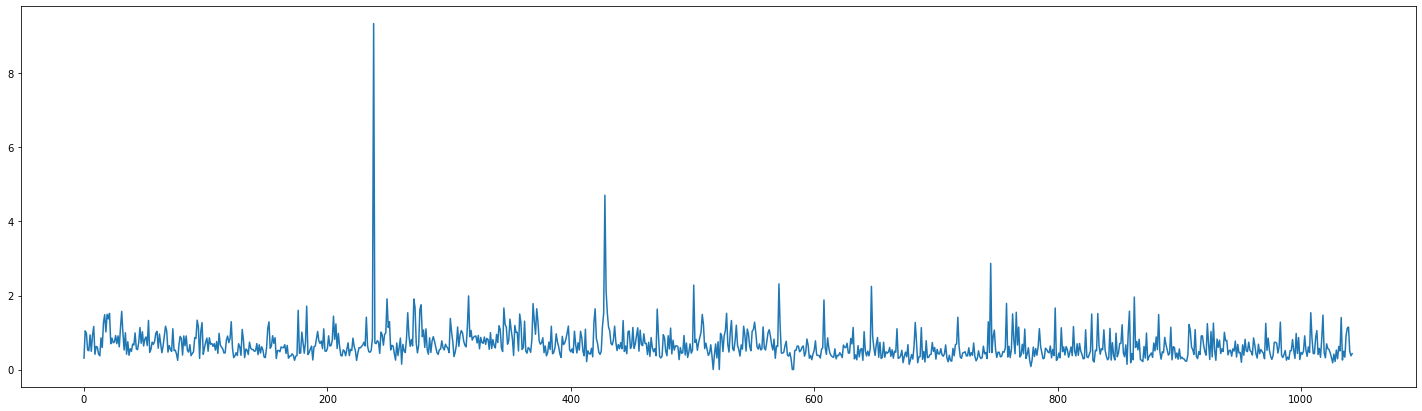

In [16]:
vol = ((data["High"])-(data["Low"]))   #volatility 
plt.figure(figsize=(25,7))
plt.plot(vol)

# Applying GARCH to model volatility

In [17]:
from arch import arch_model

In [33]:
n = data.shape[0]
test_size = int(n*0.1)

train, test = residuals[1:-test_size], residuals[-test_size:]
model=arch_model(train,vol='GARCH', p=1, q=1)
garch=model.fit()
garch.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 180672.54779057633
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1539.196664692694
Iteration:      3,   Func. Count:     24,   Neg. LLF: 730.0373504563577
Iteration:      4,   Func. Count:     30,   Neg. LLF: 700.2401367155186
Iteration:      5,   Func. Count:     35,   Neg. LLF: 700.277995670458
Iteration:      6,   Func. Count:     41,   Neg. LLF: 699.7065779163145
Iteration:      7,   Func. Count:     47,   Neg. LLF: 699.6669113021046
Iteration:      8,   Func. Count:     52,   Neg. LLF: 699.6652722888017
Iteration:      9,   Func. Count:     57,   Neg. LLF: 699.6652552605397
Iteration:     10,   Func. Count:     61,   Neg. LLF: 699.6652552603975
Optimization terminated successfully    (Exit mode 0)
            Current function value: 699.6652552605397
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -699.665
Distribution:                  Normal   AIC:                           1407.33
Method:            Maximum Likelihood   BIC:                           1426.71
                                        No. Observations:                  938
Date:                Sat, May 07 2022   Df Residuals:                      937
Time:                        05:01:46   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0184  1.634e-02     -1.129      0.259 [-5.047e-02,1.357e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.1927  3.607e-02      5.343  9.125e-08 [  0.122,  0.263]
alpha[1]       0.2228  5.016e-02      4.442  8.922e-06 [  0.124,  0.321]
beta[1]        0.0751      0.125      0.603      0.547 [ -0.169,  0.319]
========================================================================

Covariance estimator: robust
"""

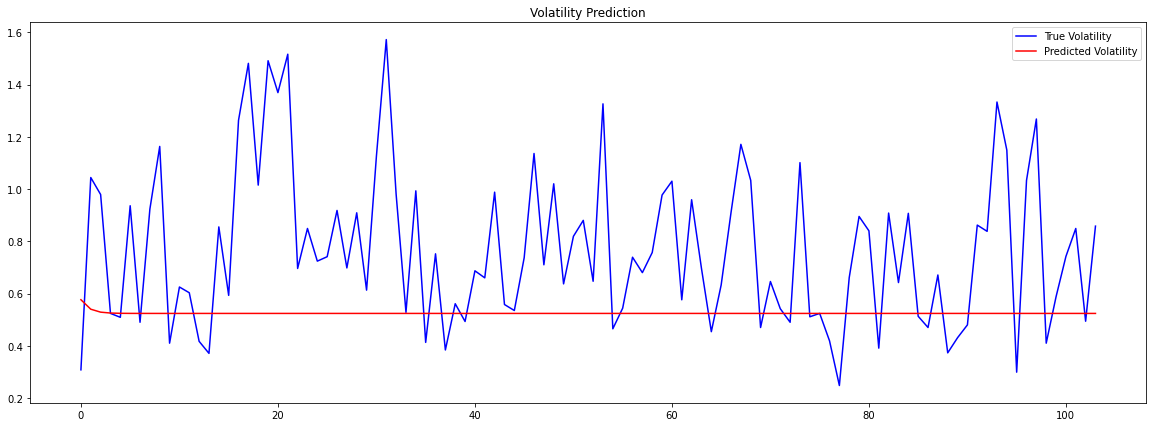

In [34]:
predict_garch = garch.forecast(horizon=test_size)
plt.figure(figsize=(20,7))
true, = plt.plot(vol[:test_size],color='blue')
preds, = plt.plot(np.sqrt(predict_garch.variance.values[-1,:]), color='red')
plt.title('Volatility Prediction')
plt.legend(['True Volatility', 'Predicted Volatility'])


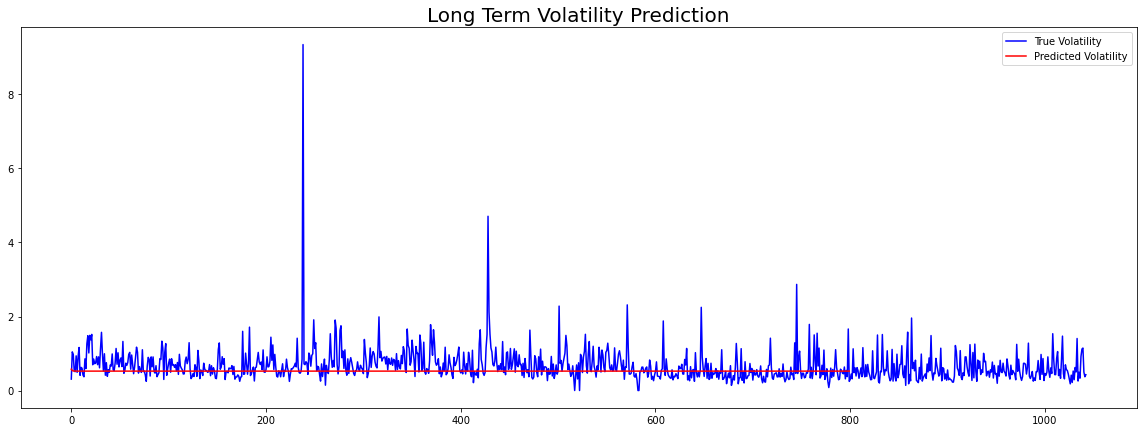

In [35]:
predict_garch_whole = garch.forecast(horizon=800)
plt.figure(figsize=(20,7))
true, = plt.plot(vol[:], color='blue')
preds, = plt.plot(np.sqrt(predict_garch_whole.variance.values[-1, :]), color='red')
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'])


# Analysing the fit of ARIMA model

In [21]:
from sklearn import metrics

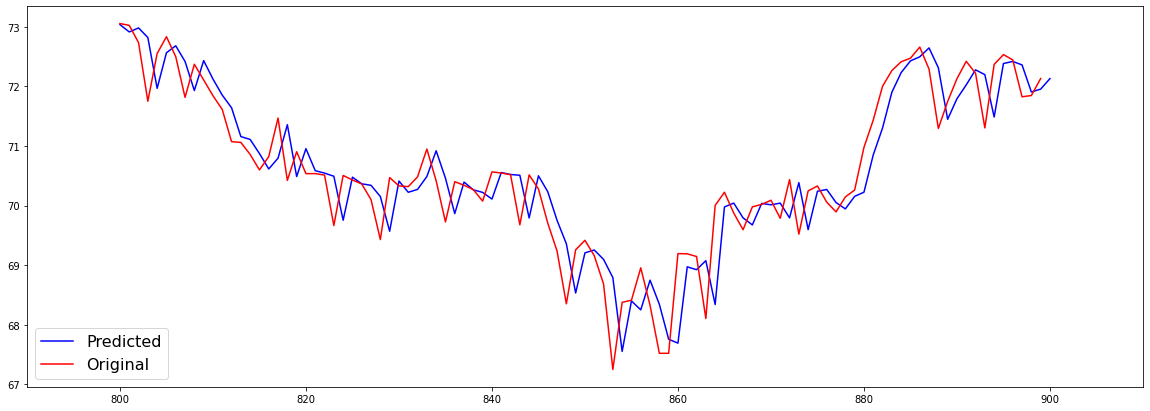

In [22]:
predict = model_fit.predict(start=800,end=900)
plt.figure(figsize=(20,7))
plt.plot(predict, color="blue")
plt.plot(data["Open"][800:900],color="red")

plt.legend(['Predicted', 'Original'], fontsize=16)
plt.xlim(790,910)
plt.show()

In [23]:
print("Mean Squared error : ", metrics.mean_squared_error(data["Close"][800:901],predict))

Mean Squared error :  0.23810325092406526


# Forecasting of AR model

In [24]:
future=pd.read_csv('./EURINR2018mon.csv')
future

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,76.514999,76.600098,76.444000,75.560303,75.560303,0
1,2018-01-02,76.514999,76.676903,76.262001,75.560303,75.560303,0
2,2018-01-03,76.466003,76.514999,76.174103,76.472000,76.472000,0
3,2018-01-04,76.195999,76.622498,76.078003,76.190002,76.190002,0
4,2018-01-05,76.421997,76.503998,76.091003,76.433998,76.433998,0
...,...,...,...,...,...,...,...
104,2018-05-25,79.945999,79.973000,78.872002,79.953003,79.953003,0
105,2018-05-28,78.819000,78.961998,78.185402,78.819000,78.819000,0
106,2018-05-29,78.292999,78.805000,78.151001,78.286003,78.286003,0
107,2018-05-30,78.190002,78.692703,77.974998,78.190002,78.190002,0


In [25]:
from statsmodels.tsa.arima_model import ARIMA

In [26]:
model = ARIMA(data["Open"], order=(2,1,2))#using ARIMA(2,1,2)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Open   No. Observations:                 1042
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -800.439
Method:                       css-mle   S.D. of innovations              0.522
Date:                Sat, 07 May 2022   AIC                           1612.878
Time:                        04:56:13   BIC                           1642.572
Sample:                             1   HQIC                          1624.141
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0082      0.014     -0.587      0.557      -0.036       0.019
ar.L1.D.Open     0.6362      0.152      4.198      0.000       0.339       0.933
ar.L2.D.Open    -0.5772      0.158     -3.651      0.000      -0.887      -0.267
ma.L1.D.Open    -0.7654      0.153     -4.998      0.000      -1.066      -0.465
ma.L2.D.Open     0.5781      0.154      3.749      0.000       0.276       0.880
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5511           -1.1953j            1.3163           -0.1812
AR.2            0.5511           +1.1953j            1.3163            0.1812
MA.1            0.6620           -1.1365j            1.3152           -0.1661
MA.2            0.6620           +1.1365j            1.3152            0.1661
-----------------------------------------------------------------------------
"""

In [27]:

fc, se, conf = model_fit.forecast(109, alpha=.05) # 3revalue returned from forecast where fc is forecasted value and
                                                    # conf is confidence
#make as pandas series
fpredict = pd.Series(fc, index=future.Date)
lower_series=pd.Series(conf[:,0],index=future.Date)
upper_series=pd.Series(conf[:,1],index=future.Date)

original = np.array(future["Open"][0:])

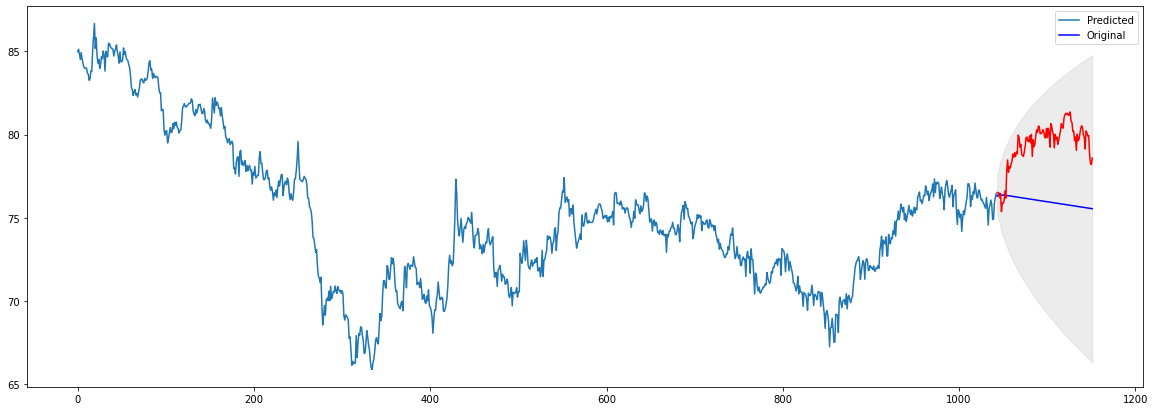

In [28]:
plt.figure(figsize=(20,7))
plt.plot(data['Open'])
plt.plot(range(1043,1043+109),fpredict, color="blue")
plt.plot(range(1043,1043+109),original,color="red")
plt.legend(['Predicted', 'Original'])
plt.fill_between(range(1043,1043+109), lower_series, upper_series, color='grey', alpha=.15)
plt.show()

Data in red color is  the actual data of intial 5 months of 2018 and the dark blue line is the prediction(along with 95% confidence) from the previous data. As, the predict function gives mean of future data regardless of variance so it gives a straight line.

In [29]:
print("Mean Squared error : ", metrics.mean_squared_error(future['Open'],fpredict))

Mean Squared error :  13.808568020253322


### Conclutions:
#### 1) Within 95% confidence interval, model is poredicting values accurately.
#### 2) So, it can be said that it is good fit from above point.
#### 3) MSE is justified as data is distibuted between 65-90 and as predicted value is almost constant line and square of the difference of them is too large. 